# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import sklearn.tree as tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from random import choices
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

## 2.1 K-means clustering

In [2]:

X = np.random.randn( 50 , 2 )
X[0:25,0] = X[0:25,0] + 3
X [0:25,1] = X[0:25,1] - 4

Text(0, 0.5, 'X2')

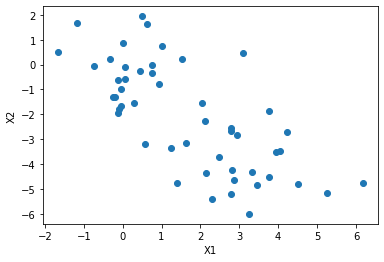

In [3]:

plt.plot(X[:,0],X[:,1],'o' )
plt.xlabel('X1')
plt.ylabel('X2')

In [4]:
kmeans = KMeans ( n_clusters = 2 , random_state = 100).fit(X)

Text(0, 0.5, 'X2')

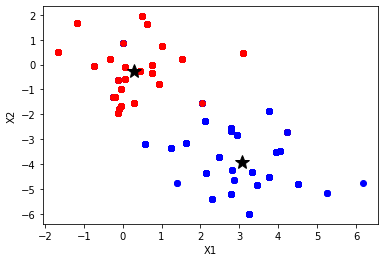

In [5]:
for i in range( 0 ,X.shape[0]):
    if kmeans.labels_[i] == 0 :
        plt.plot(X[i:,0],X[i:,1], "o",color="red" )
    else:
        plt.plot(X[i:,0],X[i:,1],"o",color="blue")
centroid1=kmeans.cluster_centers_[ 0 ]
centroid2=kmeans.cluster_centers_[ 1 ]
plt.plot(centroid1[0],centroid1[1],"*",color="black",markersize= 15 )
plt.plot(centroid2[0],centroid2[1],"*",color= "black" ,markersize = 15 )
plt.xlabel("X1")
plt.ylabel("X2")

In [6]:
scaler = StandardScaler()
dfHVC = pd.read_csv('HCVdata.csv',index_col=0,sep=";")

In [7]:

dfHVC["Category"] = pd.Categorical(
    dfHVC["Category"], categories=["0=Blood Donor", "1=Hepatitis", "2=Fibrosis","3=Cirrhosis"], ordered=False
)
dfHVC["Sex"] = pd.Categorical(
    dfHVC["Sex"], categories=["m", "f"], ordered=False
)



cat_columns = dfHVC.select_dtypes(['category']).columns

dfHVC[cat_columns] = dfHVC[cat_columns].apply(lambda x: x.cat.codes)



There is two categorical variable to apply the transform I decided to convert them into numerical variables, the first one is Category with the values 0=Blood Donor, 1=Hepatitis, 2=Fibrosis,3=Cirrhosis. The other is the sex. There is also 10 numerical variable to complete the dataset.

In [8]:

dfHVC_copy = dfHVC
dfHVC_copy = dfHVC_copy.drop(['Category', 'Sex'], axis=1)


dfHVC_scaled = scaler.fit_transform(dfHVC_copy)




We dropped the Categorical Variable since we need to scale only the numerical ones

In [27]:


dfHVC_Kmeans4=KMeans(n_clusters=4,n_init= 50,random_state = 1000).fit(dfHVC_scaled )
dfHVC_Kmeans4_labels = dfHVC_Kmeans4.labels_



dfHVC_labels = dfHVC["Category"]



pd.crosstab(index=dfHVC_labels ,
columns = dfHVC_Kmeans4_labels ,
rownames = [ 'Real groups' ] ,
colnames = ['K−means clusters'] )




K−means clusters,0,1,2,3
Real groups,,,,
0,252,244,0,0
1,1,20,0,2
2,3,17,0,0
3,3,4,3,18


The result is actually pretty good here in the 4 cluster there is always one very domminating value increasing the number of cluster might help with cluster 1 and identifing a  cluster for the categorical 1 and 2 that are currently associated with it

## 2.2 Hierarchical clustering

In [10]:
from scipy.cluster.hierarchy import linkage
hc_complete=linkage(X,"complete")

In [11]:
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

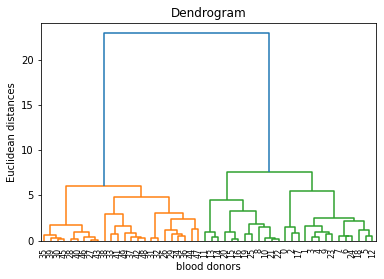

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('blood donors')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete,n_clusters=2).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


Perform hierarchical clustering using the HCVdata using complete, average and
single linkage. To begin you will cut the dendrogram at 4 clusters.

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

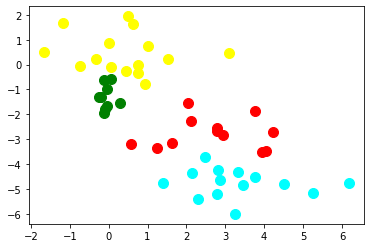

In [15]:
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s=100, c='cyan')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s=100, c='yellow')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s=100, c='red')
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s=100, c='green')


2)Plot the dendrogram. 

In [16]:
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(X,X) 
print(dist_matrix)


[[0.         4.76149252 0.99103902 ... 9.74282202 7.27913252 6.57430632]
 [4.76149252 0.         3.87909228 ... 6.93104776 4.62220208 4.0347774 ]
 [0.99103902 3.87909228 0.         ... 9.3779806  6.88064543 6.16827094]
 ...
 [9.74282202 6.93104776 9.3779806  ... 0.         2.50271263 3.21392162]
 [7.27913252 4.62220208 6.88064543 ... 2.50271263 0.         0.7124184 ]
 [6.57430632 4.0347774  6.16827094 ... 3.21392162 0.7124184  0.        ]]


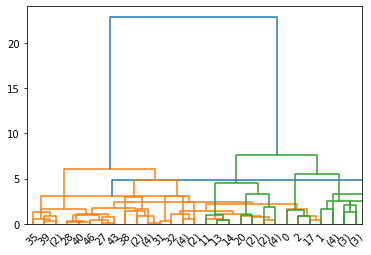

In [17]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram


hc_complete=linkage(X,"complete")
Z = hierarchy.linkage(X, method='average')
dendro = hierarchy.dendrogram(Z)




def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



hc = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
y_hc=hc.fit_predict(X)

plot_dendrogram(hc, truncate_mode="level", p=4)
plt.show()

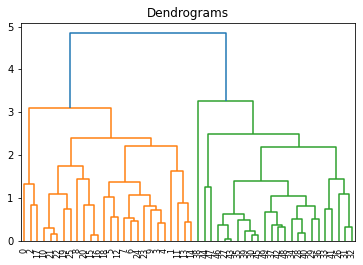

In [18]:
# Creating Dendrogram for our data
# Z = linkage matrix

  
plt.figure()
plt.title("Dendrograms")
  
# Dendrogram plotting using linkage matrix
dendrogram = hierarchy.dendrogram(Z)


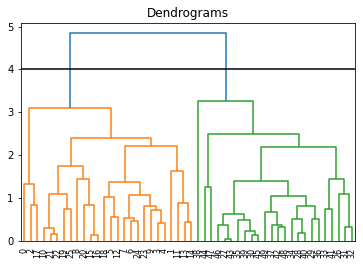

In [19]:
 #Creating Dendrogram for our data
# max_d = cut-off/ Threshold value
max_d = 4
  
Z = hierarchy.linkage(X, method='average')
plt.figure()
plt.title("Dendrograms")
dendrogram = hierarchy.dendrogram(Z)
  
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')

Do you think is it suitable to cut the dendrogram at a level different from 4 clusters ? If so, why ?
->The common practice to flatten dendrograms in k clusters is to cut them off at constant height k−1.

In [20]:
from sklearn.metrics.cluster import contingency_matrix
x = ["a", "a", "a", "b", "b", "b","c","c"]
y = [0, 0, 1, 1, 2, 2,3,3]
contingency_matrix(x, y)



array([[2, 1, 0, 0],
       [0, 1, 2, 0],
       [0, 0, 0, 2]])